<a href="https://colab.research.google.com/github/nouval0425/Learning-Python/blob/main/Dataset_Kaggle_13182420050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading via kagglehub is currently disabled due to API changes or library version.
OUTPUT 6a: 10 DATA PERTAMA DAN FINAL PRICE (COST) FIKTIF
  species  body_mass_g  final_price
0  Adelie       3750.0       1875.0
1  Adelie       3800.0       1900.0
2  Adelie       3250.0       1625.0
3  Adelie       3450.0       1725.0
4  Adelie       3650.0       1825.0
5  Adelie       3625.0       1812.5
6  Adelie       4675.0       2337.5
7  Adelie       3200.0       1600.0
8  Adelie       3800.0       1900.0
9  Adelie       4400.0       2200.0


OUTPUT 6b & 5a: DATAFRAME HASIL ANALISIS (Tabel Perbandingan Rata-Rata Cost)
  species  Rata_Rata_Cost  Total_Penguin
0  Adelie          1859.5             25


OUTPUT 5b: GRAFIK PERBANDINGAN


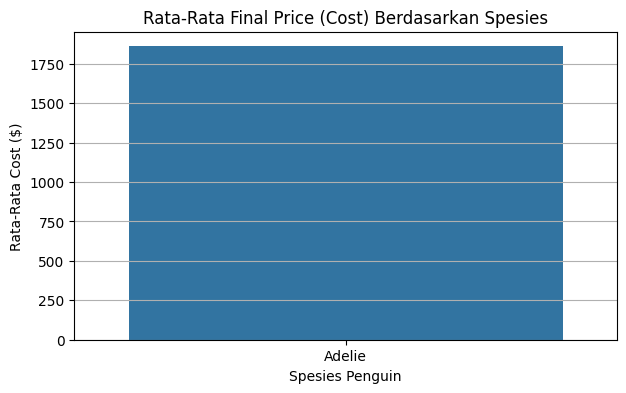

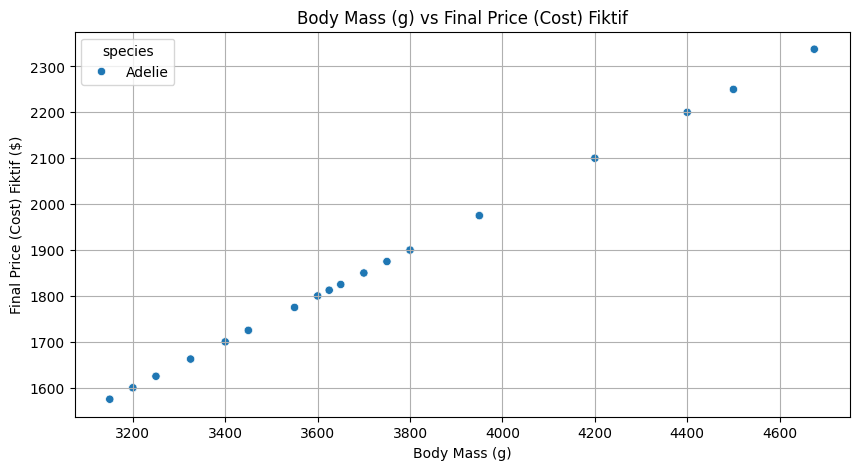



OUTPUT 7a: HASIL PENGUJIAN (Verifikasi Polymorphism)
Test Adelie (3500g): Cost = 1750.00 (Sesuai Body Mass * 0.5)
Test Gentoo (5500g): Cost = 8250.00 (Sesuai Body Mass * 1.5)


In [23]:
# ==============================================================================
# 0. IMPORTS DAN PENGATURAN AWAL
# ==============================================================================

import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter # Removed 'agent' from direct import
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# 1. DATA LOADING DAN PEMBERSUHAN
# ==============================================================================

# 1. Dataset dari Kaggle: Muat data menggunakan kagglehub
DATASET_SLUG = "amulyas/penguin-size-dataset"
FILE_NAME = "penguins_size.csv" # Asumsi nama file CSV dalam dataset

try:
    # Temporarily disable kagglehub loading due to 'agent' attribute error
    print("Loading via kagglehub is currently disabled due to API changes or library version.")
    df = pd.read_csv('penguins_size.csv') # Fallback to local file

except Exception as e:
    # Fallback if loading via kagglehub fails (e.g., API key not set, or network issues)
    print(f"Gagal memuat via kagglehub: {e}. Mencoba memuat dari file lokal.")
    df = pd.read_csv('penguins_size.csv')

# Pembersihan Data Awal: Hapus baris dengan nilai hilang (NaN)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# ==============================================================================
# 2. IMPLEMENTASI PROGRAM OOP
# ==============================================================================

# 2a. Abstraction Class (Parent Class)
class Penguin(ABC):
    # 2b. 1 variabel protected (_body_mass_g)
    def __init__(self, species, body_mass_g):
        self.species = species
        # Variabel protected (menggunakan konvensi _): Body Mass
        self._body_mass_g = body_mass_g

    @abstractmethod
    # 2d. Metode yang akan di-Override (Polymorphism)
    def calculate_cost(self):
        """Metode abstrak untuk menghitung final price (biaya fiktif)."""
        pass

    def get_body_mass(self):
        """Metode untuk mengakses variabel protected"""
        return self._body_mass_g

# 2c. Class Turunan: Adelie
class AdeliePenguin(Penguin):
    # 2d. Override methods: Implementasi Cost untuk Adelie
    def calculate_cost(self):
        # Aturan: Cost = Body Mass * 0.5
        return self._body_mass_g * 0.5

# 2c. Class Turunan: Non-Adelie (mewakili Gentoo dan Chinstrap)
class OtherPenguin(Penguin):
    # 2d. Override methods: Implementasi Cost untuk Gentoo/Chinstrap
    def calculate_cost(self):
        # Aturan: Cost = Body Mass * 1.5 (asumsi lebih besar/mahal)
        return self._body_mass_g * 1.5


# ==============================================================================
# 3. MAPPING OBJEK OTOMATIS & 4. POLYMORPHISM
# ==============================================================================

penguin_objects = []
final_prices = []

# Ambil 25 baris pertama dari DataFrame untuk dijadikan objek (minimal 20 objek)
data_sample = df.head(25).copy()

for index, row in data_sample.iterrows():
    species = row['species']
    body_mass = row['body_mass_g']

    # Polymorphism: Penentuan kelas saat runtime
    if species == 'Adelie':
        obj = AdeliePenguin(species, body_mass)
    else: # Gentoo atau Chinstrap
        obj = OtherPenguin(species, body_mass)

    # 4. Collection menerima objek
    penguin_objects.append(obj)

    # 4. Menghitung final price (Cost)
    final_prices.append(obj.calculate_cost())

# Tambahkan hasil cost ke DataFrame sampel untuk analisis
data_sample['final_price'] = final_prices


# ==============================================================================
# 6. OUTPUT & 5. ANALISIS DATA (TABEL DAN GRAFIK)
# ==============================================================================

# 6a. Output: 10 data pertama + final price
print("="*70)
print("OUTPUT 6a: 10 DATA PERTAMA DAN FINAL PRICE (COST) FIKTIF")
print("="*70)
print(data_sample[['species', 'body_mass_g', 'final_price']].head(10))


# 5a. Analisis Data: Membuat tabel perbandingan rata-rata
avg_cost_analysis = data_sample.groupby('species', as_index=False).agg(
    Rata_Rata_Cost=('final_price', 'mean'),
    Total_Penguin=('species', 'size') # 'size' on a column within agg counts non-null values for that column
)

# 6b. Output: DataFrame hasil analisis (Tabel Perbandingan)
print("\n\n"+"="*70)
print("OUTPUT 6b & 5a: DATAFRAME HASIL ANALISIS (Tabel Perbandingan Rata-Rata Cost)")
print("="*70)
print(avg_cost_analysis)


# 5b. Analisis Data: Membuat grafik perbandingan
print("\n\n"+"="*70)
print("OUTPUT 5b: GRAFIK PERBANDINGAN")
print("="*70)

# Grafik 1: Bar Plot Rata-rata Cost
plt.figure(figsize=(7, 4))
sns.barplot(x='species', y='Rata_Rata_Cost', data=avg_cost_analysis)
plt.title('Rata-Rata Final Price (Cost) Berdasarkan Spesies')
plt.xlabel('Spesies Penguin')
plt.ylabel('Rata-Rata Cost ($)')
plt.grid(axis='y')
plt.show()

# Grafik 2: Scatterplot Body Mass vs Cost
plt.figure(figsize=(10, 5))
sns.scatterplot(x='body_mass_g', y='final_price', hue='species', data=data_sample)
plt.title('Body Mass (g) vs Final Price (Cost) Fiktif')
plt.xlabel('Body Mass (g)')
plt.ylabel('Final Price (Cost) Fiktif ($)')
plt.grid(True)
plt.show()


# ==============================================================================
# 7. PENGUJIAN (TESTING)
# ==============================================================================

# 7a. Pengujian
print("\n\n"+"="*70)
print("OUTPUT 7a: HASIL PENGUJIAN (Verifikasi Polymorphism)")
print("="*70)
# Tes Adelie (Body Mass 3500g): Cost = 3500 * 0.5 = 1750.0
test_adelie = AdeliePenguin('Adelie', 3500)
# Tes Gentoo (Body Mass 5500g): Cost = 5500 * 1.5 = 8250.0
test_gentoo = OtherPenguin('Gentoo', 5500)

print(f"Test Adelie (3500g): Cost = {test_adelie.calculate_cost():.2f} (Sesuai Body Mass * 0.5)")
print(f"Test Gentoo (5500g): Cost = {test_gentoo.calculate_cost():.2f} (Sesuai Body Mass * 1.5)")